In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Ukuran plot besar
# sns.reset_defaults()
# Ukuran plot kecil
sns.reset_orig()

sns.set_style('whitegrid', {'grid.linestyle': '--'})

# Jumlah Data: Sebelum & Sesudah Prapengolahan

In [2]:
# Pastikan untuk mengganti path dengan absolute path direktorimu jika baris berikut dijalankan ulang, atau restart kernel.
os.chdir('dataset/txt')
# menentukan lokasi data awal yang memuat kelas kata negatif dan positif
base1 = 'prastyo-sentiment_posneg.txt'
LB = pd.read_csv(base1, header=None, sep='\t', names=['text', 'label'], usecols=['label'], dtype=str)

os.chdir('../../output')
# data setelah prapengolahan
base2 = 'prastyo-sentiment_posneg-clean-slang-stop-dup.txt'
Lb = pd.read_csv(base2, header=None, sep='\t', names=['text', 'label'], usecols=['label'], dtype=str)

In [3]:
print(len(LB))
print(len(Lb))

1918
1660


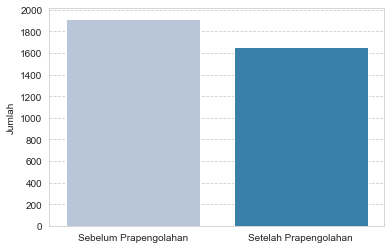

In [4]:
vol = [['Sebelum Prapengolahan', len(LB)],
       ['Setelah Prapengolahan', len(Lb)]]

df = pd.DataFrame(vol, columns=['dt_type', 'dt_vol'])

sns.set_palette('PuBu',2)
ax = sns.barplot(data=df.reset_index(), x='dt_type', y='dt_vol')
ax.set_ylabel('Jumlah')
ax.set_xlabel('')
ax.yaxis.set_ticks(np.arange(0, 2100, 200))

# plt.savefig('plot1-data_volume.png')
plt.show()

# Distribusi Kelas Negatif & Positif

In [5]:
lb_actual = 'prastyo-sentiment_posneg-clean-slang-stop-dup.txt'
lb_inset = 'prastyo-sentiment_posneg-clean-slang-stop-lb-inset.txt'
lb_senti = 'prastyo-sentiment_posneg-clean-slang-stop-lb-senti.txt'

x0 = pd.read_csv(lb_actual, header=None, sep='\t', names=['text', 'label'], usecols=['label'])
x1 = pd.read_csv(lb_inset, header=None, names=['label'])
x2 = pd.read_csv(lb_senti, header=None, names=['label'])

# x0 = x0['label'].to_list()
# x1 = x1['label'].to_list()
# x3 = x3['label'].to_list()
# df = pd.DataFrame({'Actual Label': x1,
#                    'InSet': x2,
#                    'sentistrength_id': x3})
#
df = pd.DataFrame()
df.insert(0, 'Label Aktual', x0['label'])
df.insert(1, 'InSet', x1['label'])
df.insert(2, 'sentistrength_id', x2['label'])
#
# print(df)

In [6]:
neg0 = df['Label Aktual'].str.count('neg').sum()
pos0 = df['Label Aktual'].str.count('pos').sum()
sum0 = neg0+pos0

neg1 = df['InSet'].str.count('neg').sum()
pos1 = df['InSet'].str.count('pos').sum()
sum1 = neg1+pos1

neg2 = df['sentistrength_id'].str.count('neg').sum()
pos2 = df['sentistrength_id'].str.count('pos').sum()
sum2 = neg2+pos2

print('negatives:',neg0,', positives:',pos0,', total:',sum0, '\t| actual')
print('negatives:',neg1,', positives:',pos1,', total:',sum1, '\t| inSet')
print('negatives:',neg2,', positives:',pos2,', total:',sum2, '\t| senti')

print('{:.2f}'.format(neg0/sum0*100),':', '{:.2f}'.format(pos0/sum0*100), '\t| actual')
print('{:.2f}'.format(neg1/sum1*100),':', '{:.2f}'.format(pos1/sum1*100), '\t| inSet')
print('{:.2f}'.format(neg2/sum2*100),':', '{:.2f}'.format(pos2/sum2*100), '\t| senti')

negatives: 900 , positives: 760 , total: 1660 	| actual
negatives: 1197 , positives: 463 , total: 1660 	| inSet
negatives: 1114 , positives: 546 , total: 1660 	| senti
54.22 : 45.78 	| actual
72.11 : 27.89 	| inSet
67.11 : 32.89 	| senti


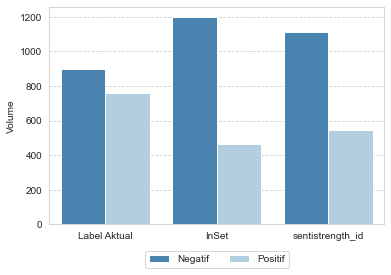

In [7]:
sns.set_palette('Blues_r', 2)
ax = sns.countplot(x='variable', hue='value', data=pd.melt(df))

ax.set_ylabel('Volume')
ax.set_xlabel('')
ax.legend().set_title('')
ax.yaxis.set_ticks(np.arange(0, 1300, 200))
lgd = ax.legend(['Negatif', 'Positif'], loc='lower center', bbox_to_anchor=(0.5,-0.2), borderaxespad=0., ncol=2)

## *Catatan: bbox_extra_artists harus berupa iterasi
# plt.savefig('plot2-label_class_distribution.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

# Skor Akurasi untuk data *imbalanced*
> untuk setiap jenis **Pelabelan** dan metode **Ekstraksi Fitur**

In [8]:
# os.getcwd()
data0 = pd.read_csv('svm_acc_lb0.txt', header=None, names=['acc'])
data0 = data0['acc'].to_list()
print(data0)
data1 = pd.read_csv('svm_acc_lb1.txt', header=None, names=['acc'])
data1 = data1['acc'].to_list()
print(data1)
data2 = pd.read_csv('svm_acc_lb2.txt', header=None, names=['acc'])
data2 = data2['acc'].to_list()
print(data2)

[78.5140562248996, 76.90763052208835, 78.714859437751]
[60.44176706827309, 59.63855421686747, 62.65060240963856]
[60.44176706827309, 59.63855421686747, 64.45783132530121]


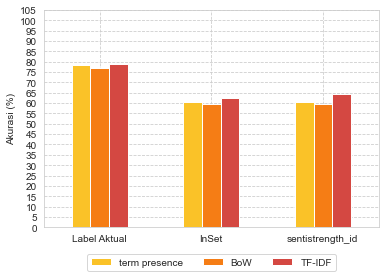

In [9]:
# nama label, akurasi_term-presence, akurasi_bow, akurasi_tfidf
data = [['Label Aktual', data0[0], data0[1], data0[2]],
        ['InSet', data1[0], data1[1], data1[2]],
        ['sentistrength_id', data2[0], data2[1], data2[2]]]

df2 = pd.DataFrame(data, columns=['', 'term presence', 'BoW', 'TF-IDF'])
# print(df2)

# plot multikolom dari dataframe
sns.set_palette('inferno_r')
ax = df2.plot(x='', y=['term presence', 'BoW', 'TF-IDF'], kind='bar')
ax.set_ylabel('Akurasi (%)')

ax.yaxis.set_ticks(np.arange(0, 110, 5))
lgd = ax.legend(loc='lower center', bbox_to_anchor=(0.5,-0.2), borderaxespad=0., ncol=3)
plt.xticks(rotation=0, ha='center')

## *Catatan: bbox_extra_artists harus berupa iterasi
# plt.savefig('plot3-SVM_accuracy_score.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

# Accuration Score for *oversampled* data
> for Each **Label** and each following **Extraction Feature** method

In [10]:
# os.getcwd()
data0 = pd.read_csv('svm_acc_o_lb0.txt', header=None, names=['acc'])
data0 = data0['acc'].to_list()
print(data0)
data1 = pd.read_csv('svm_acc_o_lb1.txt', header=None, names=['acc'])
data1 = data1['acc'].to_list()
print(data1)
data2 = pd.read_csv('svm_acc_o_lb2.txt', header=None, names=['acc'])
data2 = data2['acc'].to_list()
print(data2)

[75.50200803212851, 76.10441767068274, 79.71887550200803]
[56.024096385542165, 55.42168674698795, 62.048192771084345]
[52.40963855421686, 52.610441767068274, 62.048192771084345]


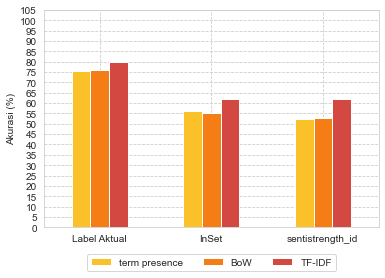

In [11]:
# nama label, akurasi_term-presence, akurasi_bow, akurasi_tfidf
data = [['Label Aktual', data0[0], data0[1], data0[2]],
        ['InSet', data1[0], data1[1], data1[2]],
        ['sentistrength_id', data2[0], data2[1], data2[2]]]

df2 = pd.DataFrame(data, columns=['', 'term presence', 'BoW', 'TF-IDF'])
# print(df2)

# plot multikolom dari dataframe
sns.set_palette('inferno_r')
ax = df2.plot(x='', y=['term presence', 'BoW', 'TF-IDF'], kind='bar')
ax.set_ylabel('Akurasi (%)')

ax.yaxis.set_ticks(np.arange(0, 110, 5))
lgd = ax.legend(loc='lower center', bbox_to_anchor=(0.5,-0.2), borderaxespad=0., ncol=3)
plt.xticks(rotation=0, ha='center')

## *Catatan: bbox_extra_artists harus berupa iterasi
# plt.savefig('plot3-SVM_oversampled_accuracy_score.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

# Accuration Score (average) for **oversampled** data with **k-Fold cv**
> for each **Label** and each following **Extraction Feature** method

In [12]:
data00 = pd.read_csv('svm_acc_ov_lb0_tp_kfold.txt', header=None, names=['acc'])
data00 = data00['acc'].to_list()
print(data00)
data00 = sum(data00)/len(data00)*100

data01 = pd.read_csv('svm_acc_ov_lb0_bow_kfold.txt', header=None, names=['acc'])
data01 = data01['acc'].to_list()
print(data01)
data01 = sum(data01)/len(data01)*100

data02 = pd.read_csv('svm_acc_ov_lb0_tfidf_kfold.txt', header=None, names=['acc'])
data02 = data02['acc'].to_list()
print(data02)
data02 = sum(data02)/len(data02)*100

# Menggabungkan nilai rata-rata
data0 = [data00, data01, data02]
print(data0)

[0.7680722891566265, 0.7530120481927711, 0.7259036144578314, 0.7108433734939759, 0.677710843373494]
[0.7620481927710844, 0.7349397590361446, 0.7108433734939759, 0.677710843373494, 0.6867469879518072]
[0.8102409638554217, 0.7951807228915663, 0.7740963855421686, 0.7891566265060241, 0.8072289156626506]
[72.71084337349397, 71.44578313253011, 79.51807228915662]


In [13]:
data10 = pd.read_csv('svm_acc_ov_lb1_tp_kfold.txt', header=None, names=['acc'])
data10 = data10['acc'].to_list()
print(data10)
data10 = sum(data10)/len(data10)*100

data11 = pd.read_csv('svm_acc_ov_lb1_bow_kfold.txt', header=None, names=['acc'])
data11 = data11['acc'].to_list()
print(data11)
data11 = sum(data11)/len(data11)*100

data12 = pd.read_csv('svm_acc_ov_lb1_tfidf_kfold.txt', header=None, names=['acc'])
data12 = data12['acc'].to_list()
print(data12)
data12 = sum(data12)/len(data12)*100

# Menggabungkan nilai rata-rata
data1 = [data10, data11, data12]
print(data1)

[0.5271084337349398, 0.5602409638554217, 0.572289156626506, 0.5331325301204819, 0.5150602409638554]
[0.5391566265060241, 0.536144578313253, 0.5542168674698795, 0.5632530120481928, 0.5090361445783133]
[0.6054216867469879, 0.5783132530120482, 0.6054216867469879, 0.5692771084337349, 0.5903614457831325]
[54.15662650602408, 54.03614457831326, 58.97590361445783]


In [14]:
data20 = pd.read_csv('svm_acc_ov_lb2_tp_kfold.txt', header=None, names=['acc'])
data20 = data20['acc'].to_list()
print(data20)
data20 = sum(data20)/len(data20)*100

data21 = pd.read_csv('svm_acc_ov_lb2_bow_kfold.txt', header=None, names=['acc'])
data21 = data21['acc'].to_list()
print(data21)
data21 = sum(data21)/len(data21)*100

data22 = pd.read_csv('svm_acc_ov_lb2_tfidf_kfold.txt', header=None, names=['acc'])
data22 = data22['acc'].to_list()
print(data22)
data22 = sum(data22)/len(data22)*100

# Menggabungkan nilai rata-rata
data2 = [data20, data21, data22]
print(data2)

[0.5271084337349398, 0.5692771084337349, 0.5421686746987951, 0.4909638554216867, 0.4698795180722891]
[0.5060240963855421, 0.5602409638554217, 0.5512048192771084, 0.4849397590361445, 0.4698795180722891]
[0.6295180722891566, 0.6054216867469879, 0.5873493975903614, 0.5632530120481928, 0.5753012048192772]
[51.98795180722892, 51.445783132530124, 59.21686746987952]


### **# Buat Plot**

                     term presence        BoW     TF-IDF
0      Label Aktual      72.710843  71.445783  79.518072
1             InSet      54.156627  54.036145  58.975904
2  sentistrength_id      51.987952  51.445783  59.216867


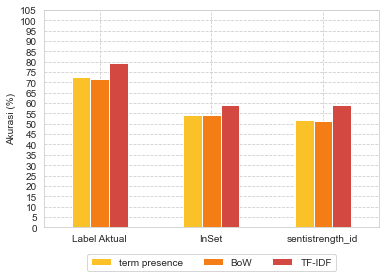

In [15]:
data = [['Label Aktual', data0[0], data0[1], data0[2]],
        ['InSet', data1[0], data1[1], data1[2]],
        ['sentistrength_id', data2[0], data2[1], data2[2]]]

df2 = pd.DataFrame(data, columns=['', 'term presence', 'BoW', 'TF-IDF'])
print(df2)

# plot multikolom dari dataframe
sns.set_palette('inferno_r')
ax = df2.plot(x='', y=['term presence', 'BoW', 'TF-IDF'], kind='bar')
ax.set_ylabel('Akurasi (%)')

ax.yaxis.set_ticks(np.arange(0, 110, 5))
lgd = ax.legend(loc='lower center', bbox_to_anchor=(0.5,-0.2), borderaxespad=0., ncol=3)
plt.xticks(rotation=0, ha='center')

## *Catatan: bbox_extra_artists harus berupa iterasi
# plt.savefig('plot4-SVM_oversampled_kfold_avg_accuracy_score.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

# Classification report (rata-rata) dari data **oversampled** dengan **k-Fold cv**
#### Rata-rata *presisi*, *recall* dan *f1-score* untuk setiap jenis label dan setiap metode **Extraksi Fitur**

### **# Label Aktual**

In [16]:
data00 = pd.read_csv('svm_cr_ov_lb0_tp_kfold.txt', header=None, sep='\t', names=['precision', 'recall', 'f1'])
data01 = pd.read_csv('svm_cr_ov_lb0_bow_kfold.txt', header=None, sep='\t', names=['precision', 'recall', 'f1'])
data02 = pd.read_csv('svm_cr_ov_lb0_tfidf_kfold.txt', header=None, sep='\t', names=['precision', 'recall', 'f1'])

### Term presence
# Presisi rata-rata
data00_a = data00['precision'].to_list()
data00_a = sum(data00_a)/len(data00_a)*100
# Recall rata-rata
data00_b = data00['recall'].to_list()
data00_b = sum(data00_b)/len(data00_b)*100
# F1-score rata-rata
data00_c = data00['f1'].to_list()
data00_c = sum(data00_c)/len(data00_c)*100
# Menggabungkan semua nilai
data00 = [data00_a, data00_b, data00_c]
print(data00)

### BoW
# Presisi rata-rata
data01_a = data01['precision'].to_list()
data01_a = sum(data01_a)/len(data01_a)*100
# Recall rata-rata
data01_b = data01['recall'].to_list()
data01_b = sum(data01_b)/len(data01_b)*100
# F1-score rata-rata
data01_c = data01['f1'].to_list()
data01_c = sum(data01_c)/len(data01_c)*100
# Menggabungkan semua nilai
data01 = [data01_a, data01_b, data01_c]
print(data01)

### TF-IDF
# Presisi rata-rata
data02_a = data02['precision'].to_list()
data02_a = sum(data02_a)/len(data02_a)*100
# Recall rata-rata
data02_b = data02['recall'].to_list()
data02_b = sum(data02_b)/len(data02_b)*100
# F1-score rata-rata
data02_c = data02['f1'].to_list()
data02_c = sum(data02_c)/len(data02_c)*100
# Menggabungkan semua nilai
data02 = [data02_a, data02_b, data02_c]
print(data02)

[67.79273673113202, 77.43760873406421, 72.2177956131472]
[66.26143620115359, 77.1448393394803, 71.23661875851568]
[79.59702881419435, 74.59132598455567, 76.85839296502058]


                    presisi  sensitivitas  f-measure
0  term presence  67.792737     77.437609  72.217796
1            BoW  66.261436     77.144839  71.236619
2         TF-IDF  79.597029     74.591326  76.858393


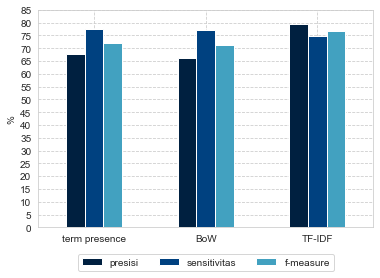

In [17]:
data = [['term presence', data00[0], data00[1], data00[2]],
        ['BoW', data01[0], data01[1], data01[2]],
        ['TF-IDF', data02[0], data02[1], data02[2]]]

dfx = pd.DataFrame(data, columns=['', 'presisi', 'sensitivitas', 'f-measure'])
print(dfx)

# plot multikolom dari dataframe
sns.set_palette('ocean',3)
ax = dfx.plot(x='', y=['presisi', 'sensitivitas', 'f-measure'], kind='bar')
ax.set_ylabel('%')

ax.yaxis.set_ticks(np.arange(0, 90, 5))
lgd = ax.legend(loc='lower center', bbox_to_anchor=(0.5,-0.2), borderaxespad=0., ncol=3)
plt.xticks(rotation=0, ha='center')

## *Catatan: bbox_extra_artists harus berupa iterasi
# plt.savefig('plot5a-SVM_oversampled_kfold_avg_cr_actual.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

### **# InSet**

In [18]:
data00 = pd.read_csv('svm_cr_ov_lb1_tp_kfold.txt', header=None, sep='\t', names=['precision', 'recall', 'f1'])
data01 = pd.read_csv('svm_cr_ov_lb1_bow_kfold.txt', header=None, sep='\t', names=['precision', 'recall', 'f1'])
data02 = pd.read_csv('svm_cr_ov_lb1_tfidf_kfold.txt', header=None, sep='\t', names=['precision', 'recall', 'f1'])

### Term presence
# Presisi rata-rata
data00_a = data00['precision'].to_list()
data00_a = sum(data00_a)/len(data00_a)*100
# Recall rata-rata
data00_b = data00['recall'].to_list()
data00_b = sum(data00_b)/len(data00_b)*100
# F1-score rata-rata
data00_c = data00['f1'].to_list()
data00_c = sum(data00_c)/len(data00_c)*100
# Menggabungkan semua nilai
data00 = [data00_a, data00_b, data00_c]
print(data00)

### BoW
# Presisi rata-rata
data01_a = data01['precision'].to_list()
data01_a = sum(data01_a)/len(data01_a)*100
# Recall rata-rata
data01_b = data01['recall'].to_list()
data01_b = sum(data01_b)/len(data01_b)*100
# F1-score rata-rata
data01_c = data01['f1'].to_list()
data01_c = sum(data01_c)/len(data01_c)*100
# Menggabungkan semua nilai
data01 = [data01_a, data01_b, data01_c]
print(data01)

### TF-IDF
# Presisi rata-rata
data02_a = data02['precision'].to_list()
data02_a = sum(data02_a)/len(data02_a)*100
# Recall rata-rata
data02_b = data02['recall'].to_list()
data02_b = sum(data02_b)/len(data02_b)*100
# F1-score rata-rata
data02_c = data02['f1'].to_list()
data02_c = sum(data02_c)/len(data02_c)*100
# Menggabungkan semua nilai
data02 = [data02_a, data02_b, data02_c]
print(data02)

[49.72927913515899, 36.83634904026177, 42.270729526583736]
[49.58372241147514, 36.76956709426045, 42.17327905596532]
[62.24704633139705, 26.070425296968182, 36.64984010957403]


                    presisi  sensitivitas  f-measure
0  term presence  49.729279     36.836349  42.270730
1            BoW  49.583722     36.769567  42.173279
2         TF-IDF  62.247046     26.070425  36.649840


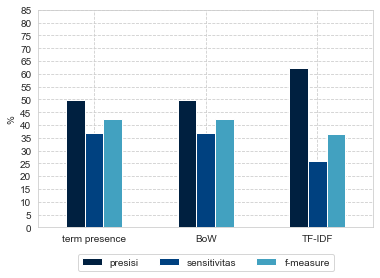

In [19]:
data = [['term presence', data00[0], data00[1], data00[2]],
        ['BoW', data01[0], data01[1], data01[2]],
        ['TF-IDF', data02[0], data02[1], data02[2]]]

dfx = pd.DataFrame(data, columns=['', 'presisi', 'sensitivitas', 'f-measure'])
print(dfx)

# plot multikolom dari dataframe
sns.set_palette('ocean',3)
ax = dfx.plot(x='', y=['presisi', 'sensitivitas', 'f-measure'], kind='bar')
ax.set_ylabel('%')

ax.yaxis.set_ticks(np.arange(0, 90, 5))
lgd = ax.legend(loc='lower center', bbox_to_anchor=(0.5,-0.2), borderaxespad=0., ncol=3)
plt.xticks(rotation=0, ha='center')

## *Catatan: bbox_extra_artists harus berupa iterasi
# plt.savefig('plot5b-SVM_oversampled_kfold_avg_cr_inset.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

### **# sentistrength_id**

In [20]:
data00 = pd.read_csv('svm_cr_ov_lb2_tp_kfold.txt', header=None, sep='\t', names=['precision', 'recall', 'f1'])
data01 = pd.read_csv('svm_cr_ov_lb2_bow_kfold.txt', header=None, sep='\t', names=['precision', 'recall', 'f1'])
data02 = pd.read_csv('svm_cr_ov_lb2_tfidf_kfold.txt', header=None, sep='\t', names=['precision', 'recall', 'f1'])

### Term presence
# Presisi rata-rata
data00_a = data00['precision'].to_list()
data00_a = sum(data00_a)/len(data00_a)*100
# Recall rata-rata
data00_b = data00['recall'].to_list()
data00_b = sum(data00_b)/len(data00_b)*100
# F1-score rata-rata
data00_c = data00['f1'].to_list()
data00_c = sum(data00_c)/len(data00_c)*100
# Menggabungkan semua nilai
data00 = [data00_a, data00_b, data00_c]
print(data00)

### BoW
# Presisi rata-rata
data01_a = data01['precision'].to_list()
data01_a = sum(data01_a)/len(data01_a)*100
# Recall rata-rata
data01_b = data01['recall'].to_list()
data01_b = sum(data01_b)/len(data01_b)*100
# F1-score rata-rata
data01_c = data01['f1'].to_list()
data01_c = sum(data01_c)/len(data01_c)*100
# Menggabungkan semua nilai
data01 = [data01_a, data01_b, data01_c]
print(data01)

### TF-IDF
# Presisi rata-rata
data02_a = data02['precision'].to_list()
data02_a = sum(data02_a)/len(data02_a)*100
# Recall rata-rata
data02_b = data02['recall'].to_list()
data02_b = sum(data02_b)/len(data02_b)*100
# F1-score rata-rata
data02_c = data02['f1'].to_list()
data02_c = sum(data02_c)/len(data02_c)*100
# Menggabungkan semua nilai
data02 = [data02_a, data02_b, data02_c]
print(data02)

[47.091133057668486, 41.72162786468248, 44.20512215069241]
[46.712957751678594, 41.70040990977343, 43.96095787976442]
[61.0634051382808, 31.30804943117214, 41.01395619384573]


                    presisi  sensitivitas  f-measure
0  term presence  47.091133     41.721628  44.205122
1            BoW  46.712958     41.700410  43.960958
2         TF-IDF  61.063405     31.308049  41.013956


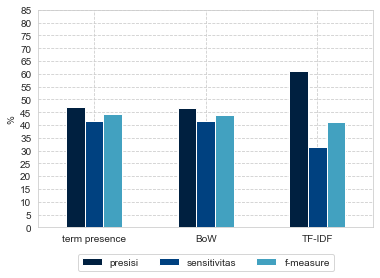

In [21]:
data = [['term presence', data00[0], data00[1], data00[2]],
        ['BoW', data01[0], data01[1], data01[2]],
        ['TF-IDF', data02[0], data02[1], data02[2]]]

dfx = pd.DataFrame(data, columns=['', 'presisi', 'sensitivitas', 'f-measure'])
print(dfx)

# plot multikolom dari dataframe
sns.set_palette('ocean',3)
ax = dfx.plot(x='', y=['presisi', 'sensitivitas', 'f-measure'], kind='bar')
ax.set_ylabel('%')

ax.yaxis.set_ticks(np.arange(0, 90, 5))
lgd = ax.legend(loc='lower center', bbox_to_anchor=(0.5,-0.2), borderaxespad=0., ncol=3)
plt.xticks(rotation=0, ha='center')

## *Catatan: bbox_extra_artists harus berupa iterasi
# plt.savefig('plot5c-SVM_oversampled_kfold_avg_cr_senti.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [22]:
# print(__doc__)

# from sklearn import svm
# from sklearn.datasets import make_blobs


# # we create 40 separable points
# X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# # fit the model, don't regularize for illustration purposes
# clf = svm.SVC(kernel='linear', C=1000)
# clf.fit(X, y)

# # s: size
# plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# # plot the decision function
# ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# # create grid to evaluate model
# # 30: n limit?
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = clf.decision_function(xy).reshape(XX.shape)

# # plot decision boundary and margins
# ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#            linestyles=['--', '-', '--'])
# # plot support vectors
# ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')
# plt.show()